# Stock Kelly Fraction Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def kelly_fraction(stock_returns):
    # returns = np.array(stock_returns)
    wins = stock_returns[stock_returns > 0]
    losses = stock_returns[stock_returns <= 0]
    W = len(wins) / len(stock_returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ( (1 - W) / R )
    return kelly_f

Text(0, 0.5, 'Kelly Fraction')

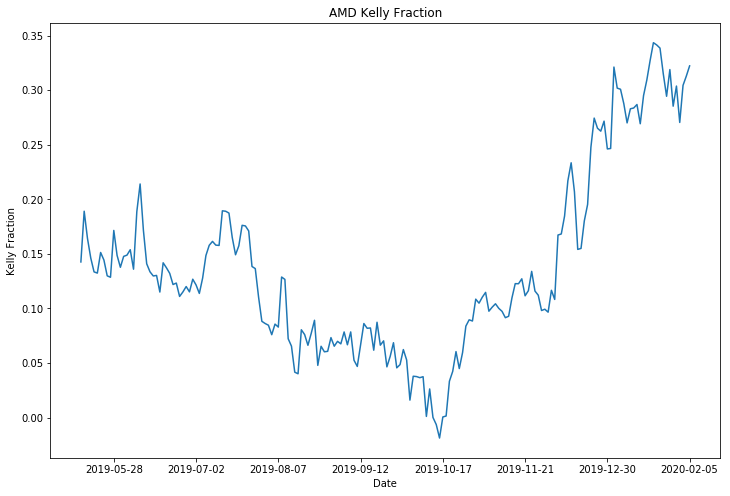

In [6]:
# Compute the running Kelly Fraction
running = [kelly_fraction(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Kelly Fraction up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kelly Fraction')
plt.xlabel('Date')
plt.ylabel('Kelly Fraction')

In [7]:
kf = kelly_fraction(stocks_returns)
kf

0.12757930844285986

In [8]:
running

[0.14264599630942115,
 0.18911176919593276,
 0.16425613777950504,
 0.14624848606370072,
 0.133535637329668,
 0.13243227371245497,
 0.1513024096741043,
 0.1443880494619601,
 0.12991381803938323,
 0.12860806686879173,
 0.17150643031980745,
 0.14865871922565282,
 0.13775100579928667,
 0.14775193438389977,
 0.1488588642603597,
 0.15383806208982276,
 0.13600751867641903,
 0.18874207638732338,
 0.2140656540927539,
 0.17165008417157168,
 0.14097793332901404,
 0.13360916363049286,
 0.1297921181793915,
 0.13028567809394676,
 0.11506766156973358,
 0.14186291674918872,
 0.1372979954065875,
 0.13217214270525757,
 0.12196103726429253,
 0.12328961043456571,
 0.11104620883195193,
 0.11515425523456563,
 0.12010931456779289,
 0.11523454644673475,
 0.12682121046754824,
 0.12157529717302895,
 0.11380390533456719,
 0.12787515674278305,
 0.14854728510870252,
 0.15788429497987339,
 0.1614653869012438,
 0.15805418922718034,
 0.15777010017119758,
 0.1894820279197531,
 0.1890926761588469,
 0.18741230960905675,